<a href="https://colab.research.google.com/github/sc-mari-a/KSVD/blob/main/Doroshenko_hw8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота 8.

[Посилання на GitHub](https://github.com/unIns1de/MN)

**Був присутній на парі**

---


In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data
import plotly.express as px

In [ ]:
uploaded = files.upload()

Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset.csv


In [ ]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Опис кожного стовпця:

**Person ID** – унікальний ідентифікатор особи

**Gender** – стать особи

**Age** – вік особи

**Occupation** – рід занять або професія.

**Sleep Duration** – тривалість сну за ніч

**Quality of Sleep** – суб’єктивна оцінка якості сну

**Physical Activity Level** – рівень фізичної активності

**Stress Level** – рівень стресу

**BMI Category** – категорія індексу маси тіла

**Blood Pressure** – артеріальний тиск

**Heart Rate** – частота серцевих скорочень (ударів на хвилину)

**Daily Steps** – кількість кроків, пройдених за день

**Sleep Disorder** – наявність або тип порушення сну

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
df.shape

(374, 13)

In [ ]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,189
Female,185


In [ ]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [ ]:
df['Occupation'].value_counts()

,count
Occupation,
Nurse,73
Doctor,71
Engineer,63
Lawyer,47
Teacher,40
Accountant,37
Salesperson,32
Scientist,4
Software Engineer,4


In [ ]:
occupation_map = {
    'Nurse': 0,
    'Doctor': 1,
    'Engineer': 2,
    'Lawyer': 3,
    'Teacher': 4,
    'Accountant': 5,
    'Salesperson': 6,
    'Scientist': 7,
    'Software Engineer': 8,
    'Sales Representative': 9,
    'Manager': 10
}

df['Occupation'] = df['Occupation'].map(occupation_map)

In [ ]:
df['BMI Category'].value_counts()

,count
BMI Category,
Normal,195
Overweight,148
Normal Weight,21
Obese,10


In [ ]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [ ]:
df['BMI Category'].value_counts()

,count
BMI Category,
Normal,216
Overweight,148
Obese,10


In [ ]:
category_map = {
    'Normal': 0,
    'Overweight':	1,
    'Obese': 2
    }

df['BMI Category'] = df['BMI Category'].map(category_map)

In [ ]:
df['BMI Category'].value_counts()

,count
BMI Category,
0,216
1,148
2,10


In [ ]:
df['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
Sleep Apnea,78
Insomnia,77


In [ ]:
df['Sleep Disorder'] = df['Sleep Disorder'].map({'Sleep Apnea': 0, 'Insomnia': 1})

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Occupation_Code
0,1,1,27,8,6.1,6,42,6,1,126/83,77,4200,NaN,8
1,2,1,28,1,6.2,6,60,8,0,125/80,75,10000,NaN,1
2,3,1,28,1,6.2,6,60,8,0,125/80,75,10000,NaN,1
3,4,1,28,9,5.9,4,30,8,2,140/90,85,3000,0.0,9
4,5,1,28,9,5.9,4,30,8,2,140/90,85,3000,0.0,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    int64  
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    int64  
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    int64  
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    float64
 13  Occupation_Code          374 non-null    int64  
dtypes: float64(2), int64(11), 

In [ ]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Occupation_Code,Systolic,Diastolic
0,1,1,27,8,6.1,6,42,6,1,126/83,77,4200,NaN,8,126,83
1,2,1,28,1,6.2,6,60,8,0,125/80,75,10000,NaN,1,125,80
2,3,1,28,1,6.2,6,60,8,0,125/80,75,10000,NaN,1,125,80
3,4,1,28,9,5.9,4,30,8,2,140/90,85,3000,0.0,9,140,90
4,5,1,28,9,5.9,4,30,8,2,140/90,85,3000,0.0,9,140,90


In [ ]:
df['Pulse Pressure'] = df['Systolic'] - df['Diastolic']
df['Mean Arterial Pressure'] = (df['Systolic'] + 2 * df['Diastolic']) / 3

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Occupation_Code,Systolic,Diastolic,Pulse Pressure,Mean Arterial Pressure
0,1,1,27,8,6.1,6,42,6,1,126/83,77,4200,NaN,8,126,83,43,97.333333
1,2,1,28,1,6.2,6,60,8,0,125/80,75,10000,NaN,1,125,80,45,95.000000
2,3,1,28,1,6.2,6,60,8,0,125/80,75,10000,NaN,1,125,80,45,95.000000
3,4,1,28,9,5.9,4,30,8,2,140/90,85,3000,0.0,9,140,90,50,106.666667
4,5,1,28,9,5.9,4,30,8,2,140/90,85,3000,0.0,9,140,90,50,106.666667


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    int64  
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    int64  
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    int64  
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    float64
 13  Occupation_Code          374 non-null    int64  
 14  Systolic                 3

In [ ]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
most_common = df['Sleep Disorder'].mode()[0]
df['Sleep Disorder'] = df['Sleep Disorder'].fillna(most_common)

In [ ]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
df.drop(columns=['Blood Pressure'], inplace=True)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Occupation_Code,Systolic,Diastolic,Pulse Pressure,Mean Arterial Pressure
0,1,1,27,8,6.1,6,42,6,1,77,4200,0.0,8,126,83,43,97.333333
1,2,1,28,1,6.2,6,60,8,0,75,10000,0.0,1,125,80,45,95.000000
2,3,1,28,1,6.2,6,60,8,0,75,10000,0.0,1,125,80,45,95.000000
3,4,1,28,9,5.9,4,30,8,2,85,3000,0.0,9,140,90,50,106.666667
4,5,1,28,9,5.9,4,30,8,2,85,3000,0.0,9,140,90,50,106.666667


# Приклади 3 графіків: matplotlib

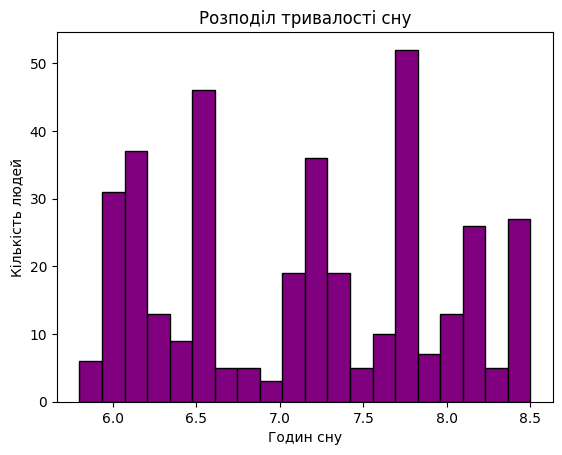

In [ ]:
most_common = df['Sleep Disorder'].mode()[0]
df['Sleep Disorder'] = df['Sleep Disorder'].fillna(most_common)

plt.hist(df['Sleep Duration'], bins=20, edgecolor='black', color='purple')
plt.title('Розподіл тривалості сну')
plt.xlabel('Годин сну')
plt.ylabel('Кількість людей')
plt.show()

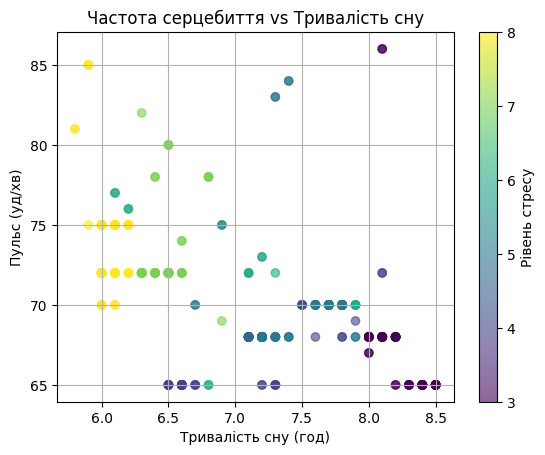

In [ ]:
plt.scatter(df['Sleep Duration'], df['Heart Rate'], c=df['Stress Level'], cmap='viridis', alpha=0.6)
plt.title('Частота серцебиття vs Тривалість сну')
plt.xlabel('Тривалість сну (год)')
plt.ylabel('Пульс (уд/хв)')
plt.colorbar(label='Рівень стресу')
plt.grid(True)
plt.show()

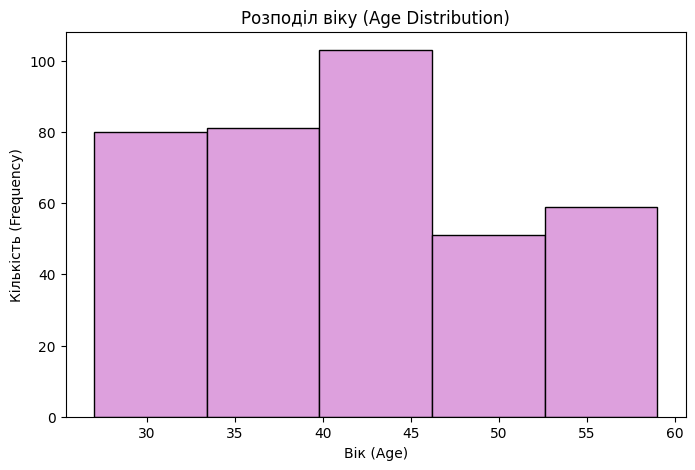

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=5, edgecolor='black', color='plum')
plt.title('Розподіл віку (Age Distribution)')
plt.xlabel('Вік (Age)')
plt.ylabel('Кількість (Frequency)')
plt.show()

# Приклади 3 графіків plotly

In [ ]:
fig = px.histogram(df, x='Sleep Duration', color='Occupation',
                   title='Розподіл тривалості сну за професією',
                   labels={'Sleep Duration': 'Тривалість сну', 'Occupation': 'Професія'},
                   barmode='overlay', # 'stack', 'group', 'overlay', 'relative'
                   opacity=0.75)
fig.show()

In [ ]:
fig = px.box(df, x='Occupation', y='Stress Level', color='Occupation',
             title='Рівень стресу за професією',
             labels={'Occupation': 'Професія', 'Stress Level': 'Рівень стресу'})
fig.show()

In [ ]:
fig = px.scatter(df, x='Age', y='Physical Activity Level', color='Stress Level',
                 title='Вік, Фіз. активність (колір: Рівень стресу)',
                 labels={'Age': 'Вік', 'Sleep Duration': 'Тривалість сну', 'Physical Activity Level': 'Фіз. активність', 'Stress Level': 'Рівень стресу'})
fig.show()

# Приклади 3 графіків seaborn


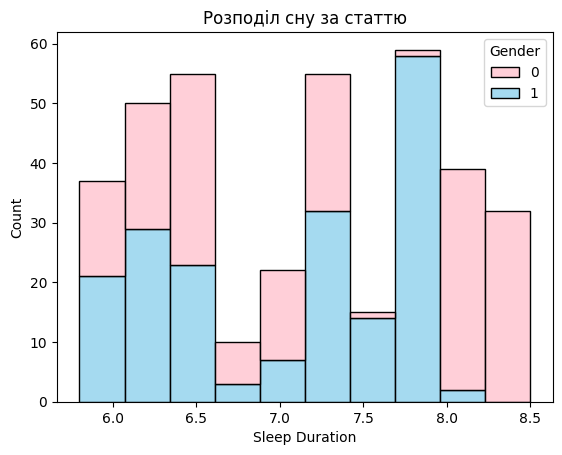

In [ ]:
sns.histplot(data=df, x='Sleep Duration', hue='Gender', multiple='stack', palette=['pink', 'skyblue'])
plt.title('Розподіл сну за статтю')
plt.show()

<ipython-input-76-af10db842b71>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




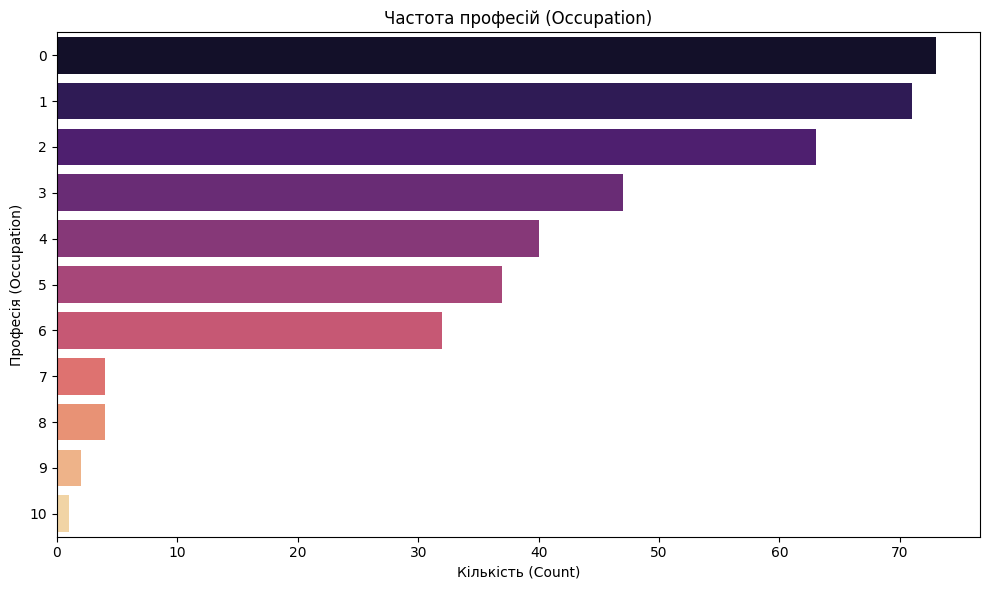

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Occupation', order=df['Occupation'].value_counts().index, palette='magma')
plt.title('Частота професій (Occupation)')
plt.xlabel('Кількість (Count)')
plt.ylabel('Професія (Occupation)')
plt.tight_layout()
plt.show()

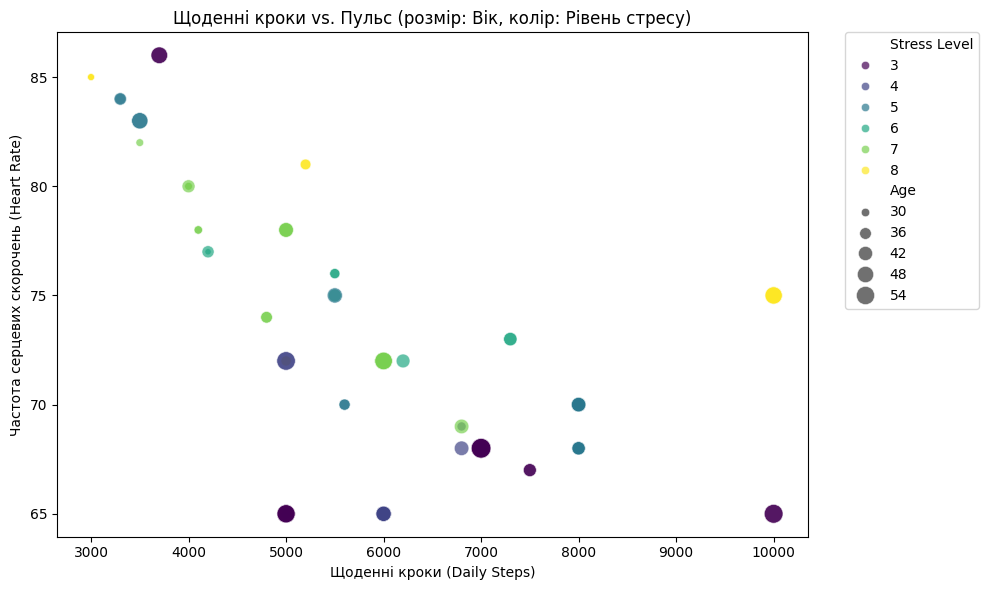

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Daily Steps', y='Heart Rate', size='Age', hue='Stress Level',
                sizes=(20, 200), palette='viridis', alpha=0.7)
plt.title('Щоденні кроки vs. Пульс (розмір: Вік, колір: Рівень стресу)')
plt.xlabel('Щоденні кроки (Daily Steps)')
plt.ylabel('Частота серцевих скорочень (Heart Rate)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

#Приклад графіка altair

In [ ]:
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('Occupation:N', sort='-y'),
    y='count()',
    color=alt.Color('Gender:N', scale=alt.Scale(range=['pink', 'skyblue']))
).properties(
    title='Кількість людей за професією та статтю'
)

chart.show()

alt.Chart(...)

# Висновки:

В даній лабораторній роботі було проведено аналіз датасету про сон із використанням Pandas. Також ми візуалізували дані з допомогою бібліотек matplotlib, plotly, seaborn і altair.
